In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
!ls

DL-1.ipynb  golden_retriever.jpeg


In [29]:
#Reading image using OpenCV
img = cv2.imread("golden_retriever.jpeg",0)

In [30]:
#Showing image using OpenCV
cv2.imshow("Golden Retriever", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
#Read image using matplotlib
image = plt.imread("golden_retriever.jpeg")

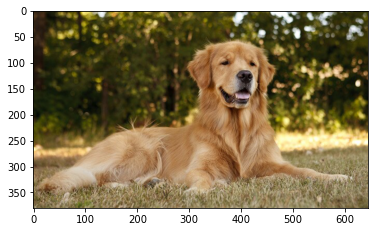

In [44]:
#Showing image using matplotlib
plt.imshow(image)

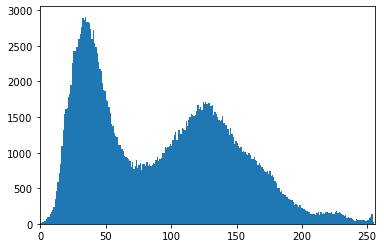

In [33]:
#Calculate histogram

img = cv2.imread('golden_retriever.jpeg')
vals = img.mean(axis=2).flatten()
counts, bins = np.histogram(vals, range(257))
plt.bar(bins[:-1] - 0.5, counts, width=1, edgecolor='none')
plt.xlim([-0.5, 255.5])
plt.show()

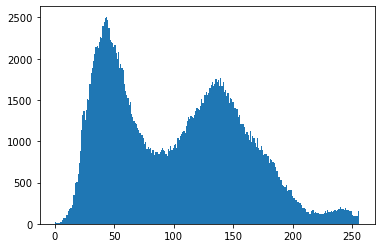

In [47]:
#Calculate histogram on b/w image
img_gray = cv2.imread('golden_retriever.jpeg',0)
plt.hist(img_gray.ravel(),256,[0,256]); plt.show()

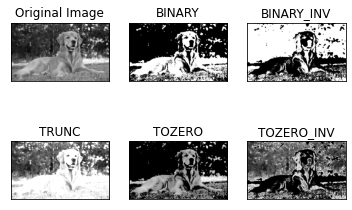

In [50]:
#Median tresholding on entire image
ret,thresh1 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_gray,127,255,cv2.THRESH_TOZERO_INV)


titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

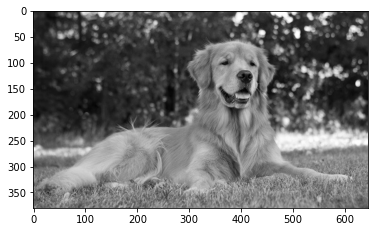

In [52]:
plt.imshow(img_gray, cmap='gray')

In [54]:
data = np.asarray(img_gray)

In [55]:
data

array([[ 76,  64,  57, ...,  48,  50,  51],
       [ 65,  57,  53, ...,  48,  50,  50],
       [ 53,  49,  49, ...,  49,  50,  50],
       ...,
       [115, 137, 130, ...,  85,  85,  94],
       [111, 126, 123, ...,  81,  79,  86],
       [107, 116, 111, ...,  80,  77,  83]], dtype=uint8)

In [ ]:
#ROW wise image thresholding

In [57]:
#calculate median of each row
median_row = []

for row in data:
    median_row.append(np.median(row))

In [63]:
median_row

[89.0,
 86.0,
 82.0,
 81.0,
 80.0,
 81.0,
 84.0,
 81.0,
 78.0,
 76.0,
 72.0,
 72.0,
 72.0,
 72.0,
 70.0,
 67.0,
 66.0,
 66.0,
 66.0,
 66.0,
 63.0,
 61.0,
 60.0,
 60.0,
 59.0,
 60.0,
 61.0,
 61.0,
 62.0,
 65.0,
 65.0,
 64.0,
 61.0,
 60.0,
 60.0,
 60.0,
 59.0,
 59.0,
 59.0,
 60.0,
 62.0,
 62.0,
 62.0,
 62.0,
 63.0,
 63.0,
 62.0,
 62.0,
 60.0,
 61.0,
 60.0,
 57.0,
 56.0,
 55.0,
 52.0,
 51.0,
 50.0,
 48.0,
 47.0,
 47.0,
 48.0,
 49.0,
 51.0,
 52.0,
 51.0,
 51.0,
 49.0,
 49.0,
 49.0,
 48.0,
 50.0,
 49.0,
 49.0,
 50.0,
 51.0,
 51.0,
 50.0,
 50.0,
 50.0,
 50.0,
 49.0,
 49.0,
 48.0,
 48.0,
 48.0,
 48.0,
 48.0,
 47.0,
 46.0,
 45.0,
 45.0,
 44.0,
 45.0,
 46.0,
 47.0,
 47.0,
 48.0,
 47.0,
 46.0,
 47.0,
 47.0,
 47.0,
 47.0,
 47.0,
 48.0,
 50.0,
 55.0,
 57.0,
 58.0,
 59.0,
 60.0,
 62.0,
 64.0,
 66.0,
 65.0,
 63.0,
 60.0,
 62.0,
 63.0,
 62.0,
 63.0,
 62.0,
 61.0,
 58.0,
 57.0,
 57.0,
 57.0,
 55.0,
 54.0,
 52.0,
 51.0,
 50.0,
 51.0,
 51.0,
 50.0,
 50.0,
 49.0,
 49.0,
 49.0,
 48.0,
 48.0,
 48.0,
 47.0,

In [65]:
#for each row, check each pixel and if the intensity is less than median value then assign 0, else assign 255
median_count=0
for row in data:
    for i in range(len(row)):
        if row[i]<median_row[median_count]:
            row[i]=0
        else:
            row[i]=255
    median_count= median_count+1

In [66]:
data

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [68]:
#convert from array to image
from PIL import Image
image2 = Image.fromarray(data)

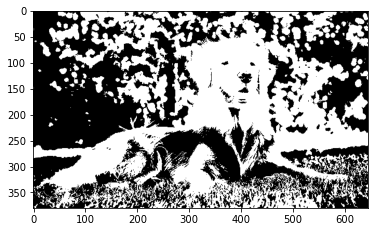

In [69]:
plt.imshow(image2, cmap='gray')

In [70]:
#COLUMN wise image thresholding

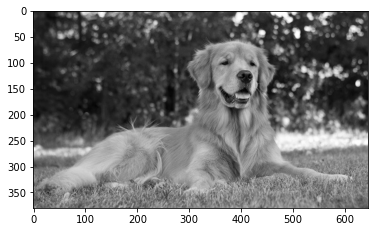

In [79]:
img_gray = cv2.imread('golden_retriever.jpeg',0)
plt.imshow(img_gray, cmap='gray')

In [80]:
data = np.asarray(img_gray)

In [81]:
data

array([[ 76,  64,  57, ...,  48,  50,  51],
       [ 65,  57,  53, ...,  48,  50,  50],
       [ 53,  49,  49, ...,  49,  50,  50],
       ...,
       [115, 137, 130, ...,  85,  85,  94],
       [111, 126, 123, ...,  81,  79,  86],
       [107, 116, 111, ...,  80,  77,  83]], dtype=uint8)

In [82]:
#rotate image to convert columns to rows
data = np.rot90(data, k=1, axes=(0,1))

In [83]:
data

array([[ 51,  50,  50, ...,  94,  86,  83],
       [ 50,  50,  50, ...,  85,  79,  77],
       [ 48,  48,  49, ...,  85,  81,  80],
       ...,
       [ 57,  53,  49, ..., 130, 123, 111],
       [ 64,  57,  49, ..., 137, 126, 116],
       [ 76,  65,  53, ..., 115, 111, 107]], dtype=uint8)

In [84]:
#calculate median of each row
median_row = []

for row in data:
    median_row.append(np.median(row))

In [85]:
#for each row, check each pixel and if the intensity is less than median value then assign 0, else assign 255
median_count=0
for row in data:
    for i in range(len(row)):
        if row[i]<median_row[median_count]:
            row[i]=0
        else:
            row[i]=255
    median_count= median_count+1

In [86]:
data

array([[  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [87]:
#re rotate array to convert rows into columns

data = np.rot90(data, k=1, axes=(1,0))

In [88]:
#convert from array to image
from PIL import Image
image2 = Image.fromarray(data)

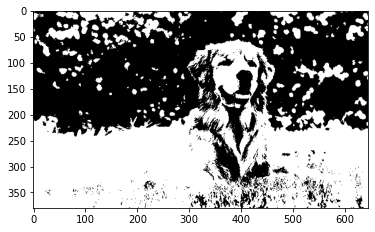

In [89]:
plt.imshow(image2, cmap='gray')